In [1]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm


# Data Cleaning(replace negatives and sum up for average daily cost)

In [2]:
#import dataframe of all unit and all period with sales and average daily cost
df = pd.read_excel('/Users/yang/Documents/RMS Project/output.xlsx')
df

,Unit,Period,Days,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,Other Controllables,...,Average daily Crew Labor,Average daily Maintenance & Repair,Average daily Management Labor,Average daily Other Controllables,Average daily Other Labor-related Costs,Average daily Other Non-controllables,Average daily Outside Services,Average daily Promotion,Average daily Rent,Average daily Utilities
0,00040302CD88,1,30,3778,20557,2190,486,5135,3983,3167,...,16.20,171.17,132.77,105.57,114.30,262.63,282.07,13.37,-20.33,189.67
1,00040302CD88,2,31,3805,20876,2058,1376,1553,4255,3899,...,44.39,50.10,137.26,125.77,119.32,255.42,171.90,14.35,-5.74,158.61
2,00040302CD88,3,30,3440,19531,2291,178,2321,4241,3646,...,5.93,77.37,141.37,121.53,120.47,249.03,168.73,18.43,-17.57,156.40
3,00040302CD88,4,31,3672,20999,2056,36597,3412,5515,2581,...,1180.55,110.06,177.90,83.26,224.00,243.13,192.48,28.19,-11.39,183.84
4,00040302CD88,5,31,3827,21357,2312,29942,3345,5484,3772,...,965.87,107.90,176.90,121.68,229.32,205.97,184.74,20.48,-5.39,164.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,20,30,15729,99236,10557,75243,8789,3997,2729,...,2508.10,292.97,133.23,90.97,522.60,889.07,382.53,-0.10,2145.83,207.67
212,0004030BEB57,21,31,12227,108507,13137,94509,1704,4989,6187,...,3048.68,54.97,160.94,199.58,491.81,1269.26,521.68,-36.90,2623.77,209.03
213,0004030BEB57,22,31,15255,101713,10812,82894,3256,4278,4408,...,2674.00,105.03,138.00,142.19,521.55,907.74,360.94,85.97,1880.90,265.68
214,0004030BEB57,23,28,15020,98547,11558,83338,3605,5253,3443,...,2976.36,128.75,187.61,122.96,587.64,999.96,380.21,21.71,2028.07,94.86


In [3]:
# Sort the DataFrame by 'Unit Name' to ensure consecutive rows have the same 'Unit Name'
df.sort_values('Unit', inplace=True)

# Create a new column 'Adjusted Daily Rent' with the same values as the original 'Rent' column
df['Adjusted Daily Rent'] = df['Average daily Rent']

# Replace negative values with NaN within each group
df.loc[df['Adjusted Daily Rent'] < 0, 'Adjusted Daily Rent'] = np.nan

# Calculate the average of positive values within each group
df['Adjusted Daily Rent'] = df.groupby('Unit')['Adjusted Daily Rent'].transform(lambda x: x[x > 0].mean())

# Printing the updated DataFrame
print(df)



             Unit  Period  Days  Advertising  Cost of Sales - Food  \
0    00040302CD88       1    30         3778                 20557   
23   00040302CD88      24    31         6019                 42455   
22   00040302CD88      23    28         5106                 36857   
21   00040302CD88      22    31         5287                 37534   
20   00040302CD88      21    31         3384                 39325   
..            ...     ...   ...          ...                   ...   
193  0004030BEB57       2    31        18686                 96726   
192  0004030BEB57       1    30        17682                 90242   
214  0004030BEB57      23    28        15020                 98547   
202  0004030BEB57      11    28        15069                 80792   
215  0004030BEB57      24    31        17368                110366   

     Cost of Sales - Paper  Crew Labor  Maintenance & Repair  \
0                     2190         486                  5135   
23                    4747     

In [4]:
#drop the previos average daily rent(have negatives)
df = df.drop('Average daily Rent', axis=1)
df

,Unit,Period,Days,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,Other Controllables,...,Average daily Crew Labor,Average daily Maintenance & Repair,Average daily Management Labor,Average daily Other Controllables,Average daily Other Labor-related Costs,Average daily Other Non-controllables,Average daily Outside Services,Average daily Promotion,Average daily Utilities,Adjusted Daily Rent
0,00040302CD88,1,30,3778,20557,2190,486,5135,3983,3167,...,16.20,171.17,132.77,105.57,114.30,262.63,282.07,13.37,189.67,15.003333
23,00040302CD88,24,31,6019,42455,4747,38835,3224,4898,2482,...,1252.74,104.00,158.00,80.06,247.10,408.03,315.23,14.97,254.68,15.003333
22,00040302CD88,23,28,5106,36857,4128,33044,3239,4405,2697,...,1180.14,115.68,157.32,96.32,228.86,397.61,270.36,6.89,65.71,15.003333
21,00040302CD88,22,31,5287,37534,3907,34158,3989,3881,2572,...,1101.87,128.68,125.19,82.97,213.13,373.61,259.97,19.81,239.06,15.003333
20,00040302CD88,21,31,3384,39325,5077,38354,2782,3210,5325,...,1237.23,89.74,103.55,171.77,214.48,390.55,309.71,27.19,212.00,15.003333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0004030BEB57,2,31,18686,96726,10280,97802,4534,4816,7717,...,3154.90,146.26,155.35,248.94,610.61,987.87,399.74,21.48,254.94,2175.308333
192,0004030BEB57,1,30,17682,90242,9634,85914,4689,4660,5070,...,2863.80,156.30,155.33,169.00,580.00,976.93,532.87,26.80,255.90,2175.308333
214,0004030BEB57,23,28,15020,98547,11558,83338,3605,5253,3443,...,2976.36,128.75,187.61,122.96,587.64,999.96,380.21,21.71,94.86,2175.308333
202,0004030BEB57,11,28,15069,80792,9890,76779,6006,5326,3969,...,2742.11,214.50,190.21,141.75,537.54,984.46,417.50,29.29,300.96,2175.308333


In [5]:
#sum up the columns for average daily cost 
df['Average Daily Cost'] = df.iloc[:, 18:].sum(axis=1)
df

,Unit,Period,Days,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,Other Controllables,...,Average daily Maintenance & Repair,Average daily Management Labor,Average daily Other Controllables,Average daily Other Labor-related Costs,Average daily Other Non-controllables,Average daily Outside Services,Average daily Promotion,Average daily Utilities,Adjusted Daily Rent,Average Daily Cost
0,00040302CD88,1,30,3778,20557,2190,486,5135,3983,3167,...,171.17,132.77,105.57,114.30,262.63,282.07,13.37,189.67,15.003333,2060.983333
23,00040302CD88,24,31,6019,42455,4747,38835,3224,4898,2482,...,104.00,158.00,80.06,247.10,408.03,315.23,14.97,254.68,15.003333,4372.463333
22,00040302CD88,23,28,5106,36857,4128,33044,3239,4405,2697,...,115.68,157.32,96.32,228.86,397.61,270.36,6.89,65.71,15.003333,3997.643333
21,00040302CD88,22,31,5287,37534,3907,34158,3989,3881,2572,...,128.68,125.19,82.97,213.13,373.61,259.97,19.81,239.06,15.003333,3896.093333
20,00040302CD88,21,31,3384,39325,5077,38354,2782,3210,5325,...,89.74,103.55,171.77,214.48,390.55,309.71,27.19,212.00,15.003333,4203.543333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0004030BEB57,2,31,18686,96726,10280,97802,4534,4816,7717,...,146.26,155.35,248.94,610.61,987.87,399.74,21.48,254.94,2175.308333,11607.198333
192,0004030BEB57,1,30,17682,90242,9634,85914,4689,4660,5070,...,156.30,155.33,169.00,580.00,976.93,532.87,26.80,255.90,2175.308333,11221.438333
214,0004030BEB57,23,28,15020,98547,11558,83338,3605,5253,3443,...,128.75,187.61,122.96,587.64,999.96,380.21,21.71,94.86,2175.308333,11607.698333
202,0004030BEB57,11,28,15069,80792,9890,76779,6006,5326,3969,...,214.50,190.21,141.75,537.54,984.46,417.50,29.29,300.96,2175.308333,10972.268333


In [6]:
df.dtypes

Unit                                        object
Period                                       int64
Days                                         int64
Advertising                                  int64
Cost of Sales - Food                         int64
Cost of Sales - Paper                        int64
Crew Labor                                   int64
Maintenance & Repair                         int64
Management Labor                             int64
Other Controllables                          int64
Other Labor-related Costs                    int64
Other Non-controllables                      int64
Outside Services                             int64
Promotion                                    int64
Rent                                         int64
Sales                                        int64
Utilities                                    int64
Average daily Advertising                  float64
Average daily Cost of Sales - Food         float64
Average daily Cost of Sales - P

# Diagram and regression analysis for all the units for each time period

<AxesSubplot:xlabel='Sales', ylabel='Average Daily Cost'>

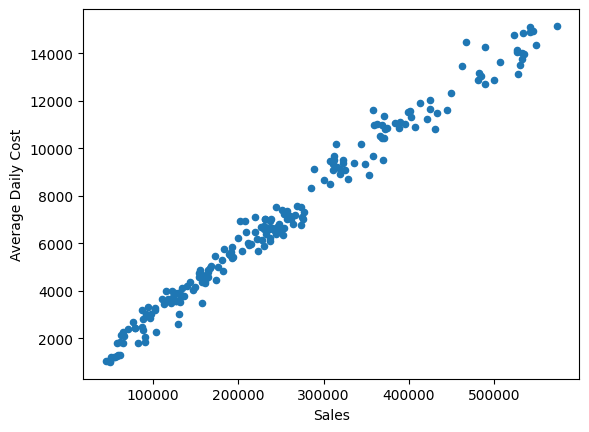

In [7]:
df.plot.scatter(x = 'Sales', y = 'Average Daily Cost')

In [8]:
import statsmodels.api as sm

In [9]:
y = df['Average Daily Cost']
X = df['Sales']
#need to add a constant for the intercept
X = sm.add_constant(X)

In [10]:
X.head()

,const,Sales
0,1.0,89952
23,1.0,143320
22,1.0,121580
21,1.0,125878
20,1.0,139440


In [11]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

In [12]:
fitted_model.params

const    283.555699
Sales      0.026951
dtype: float64

In [13]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Average Daily Cost   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.134e+04
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          2.34e-187
Time:                        20:59:06   Log-Likelihood:                -1651.4
No. Observations:                 216   AIC:                             3307.
Df Residuals:                     214   BIC:                             3314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        283.5557     71.591      3.961      0.0

# Create dummy variables 

In [14]:
# Create dummy variables for the Unit column
dummy_units = pd.get_dummies(df['Unit'], prefix='Unit', drop_first=True)
dummy_units = dummy_units.astype(int)

In [15]:
# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_units], axis=1)


In [16]:
# Define the independent and dependent variables
X = df[['Average Daily Cost'] + list(dummy_units.columns)]
y = df['Sales']

In [17]:
# Add a constant to the independent variables
X = sm.add_constant(X)
X

,const,Average Daily Cost,Unit_00040302CE36,Unit_00040302CF03,Unit_00040302CF28,Unit_00040302D006,Unit_00040302D014,Unit_0004030A635E,Unit_0004030B92EE,Unit_0004030BEB57
0,1.0,2060.983333,0,0,0,0,0,0,0,0
23,1.0,4372.463333,0,0,0,0,0,0,0,0
22,1.0,3997.643333,0,0,0,0,0,0,0,0
21,1.0,3896.093333,0,0,0,0,0,0,0,0
20,1.0,4203.543333,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
193,1.0,11607.198333,0,0,0,0,0,0,0,1
192,1.0,11221.438333,0,0,0,0,0,0,0,1
214,1.0,11607.698333,0,0,0,0,0,0,0,1
202,1.0,10972.268333,0,0,0,0,0,0,0,1


In [18]:
# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

In [19]:
# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1769.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          8.58e-190
Time:                        20:59:18   Log-Likelihood:                -2389.9
No. Observations:                 216   AIC:                             4800.
Df Residuals:                     206   BIC:                             4833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.809e+04   6656